In [32]:
import numpy as np
from sklearn import preprocessing
from tensorflow.keras.datasets import mnist
from helpers import exp_range, plot_learning_curve, plot_validation_curve

import pydotplus
import pandas as pd
import numpy as np
from io import StringIO
# from sklearn.externals.six import StringIO
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from classes import BalancedUndersamplingShuffle, balanced_sampling
from sklearn.metrics import check_scoring
from sklearn.model_selection._validation import _fit_and_score
from sklearn.model_selection import ShuffleSplit, StratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn.metrics import fbeta_score, make_scorer


In [33]:

# Define the One-hot Encoder
ohe = preprocessing.OneHotEncoder()

# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape data
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# # Fit and transform training data
# ohe.fit(y_train)
# y_train_ohe = ohe.transform(y_train).toarray()

# # Fit and transform testing data
# ohe.fit(y_test)
# y_test_ohe = ohe.transform(y_test).toarray()

# Print results
print(f'Value without encoding: {y_test[123]}')
print(f'Value with encoding: {transformed_test[123]}')

Value without encoding: [6]
Value with encoding: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [34]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [36]:
# Naive fit
classifier = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=10)
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)



0.8781

# Validation Curves and tuning

### max_depth

In [38]:
max_depth_range = list(set(list(range(1, 11)) + list(exp_range(1, 20, increment=1, exp=1.5))))
max_depth_range.sort()

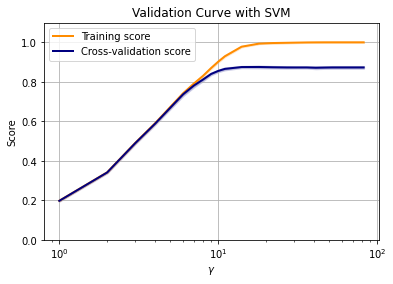

In [40]:
# max_depth - accuracy

scoring = 'accuracy'
classifier = DecisionTreeClassifier(random_state=0, criterion='gini')
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
train_scores_r, test_scores_r = plot_validation_curve(classifier, X_train, y_train, 
                      param_name='max_depth', param_range=max_depth_range,
                      cv=cv, scoring=scoring, n_jobs=8)
